In [ ]:
#Checking for GPU

!nvidia-smi

Thu Feb  6 14:28:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
#Storing path into HOME

import os
%cd /content/drive/MyDrive/Visual_Train
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Visual_Train
/content/drive/MyDrive/Visual_Train


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 5.18 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/drive/MyDrive/Visual_Train/yolov9


In [ ]:
#Downloading weights

!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
%cd {HOME}/yolov9

/content/drive/MyDrive/Visual_Train/yolov9


In [ ]:
#Using roboflow to install the dataset
'''
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3LTWFbmkUdNxoTQmynVW")
project = rf.workspace("thermal-imaging-0hwfw").project("flir-data-set")
version = project.version(27)
dataset = version.download("yolov9")
'''

'\n!pip install roboflow\n\nfrom roboflow import Roboflow\nrf = Roboflow(api_key="3LTWFbmkUdNxoTQmynVW")\nproject = rf.workspace("thermal-imaging-0hwfw").project("flir-data-set")\nversion = project.version(27)\ndataset = version.download("yolov9")\n'

In [ ]:
%cd {HOME}/yolov9
DATASET='/content/drive/MyDrive/Dataset/llvip-visible-320'

!python train.py \
--batch 16 --epochs 10 --img 320 --device 0 --min-items 0 --close-mosaic 15 \
--data {DATASET}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/drive/MyDrive/Visual_Train/yolov9
2025-01-28 15:01:23.638689: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-28 15:01:23.663429: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-28 15:01:23.669929: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-28 15:01:23.685621: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
20

In [ ]:

!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				     labels_correlogram.jpg  PR_curve.png  weights
events.out.tfevents.1738076498.bd910ae404bf.18289.0  labels.jpg		     R_curve.png
F1_curve.png					     opt.yaml		     results.csv
hyp.yaml					     P_curve.png	     results.png


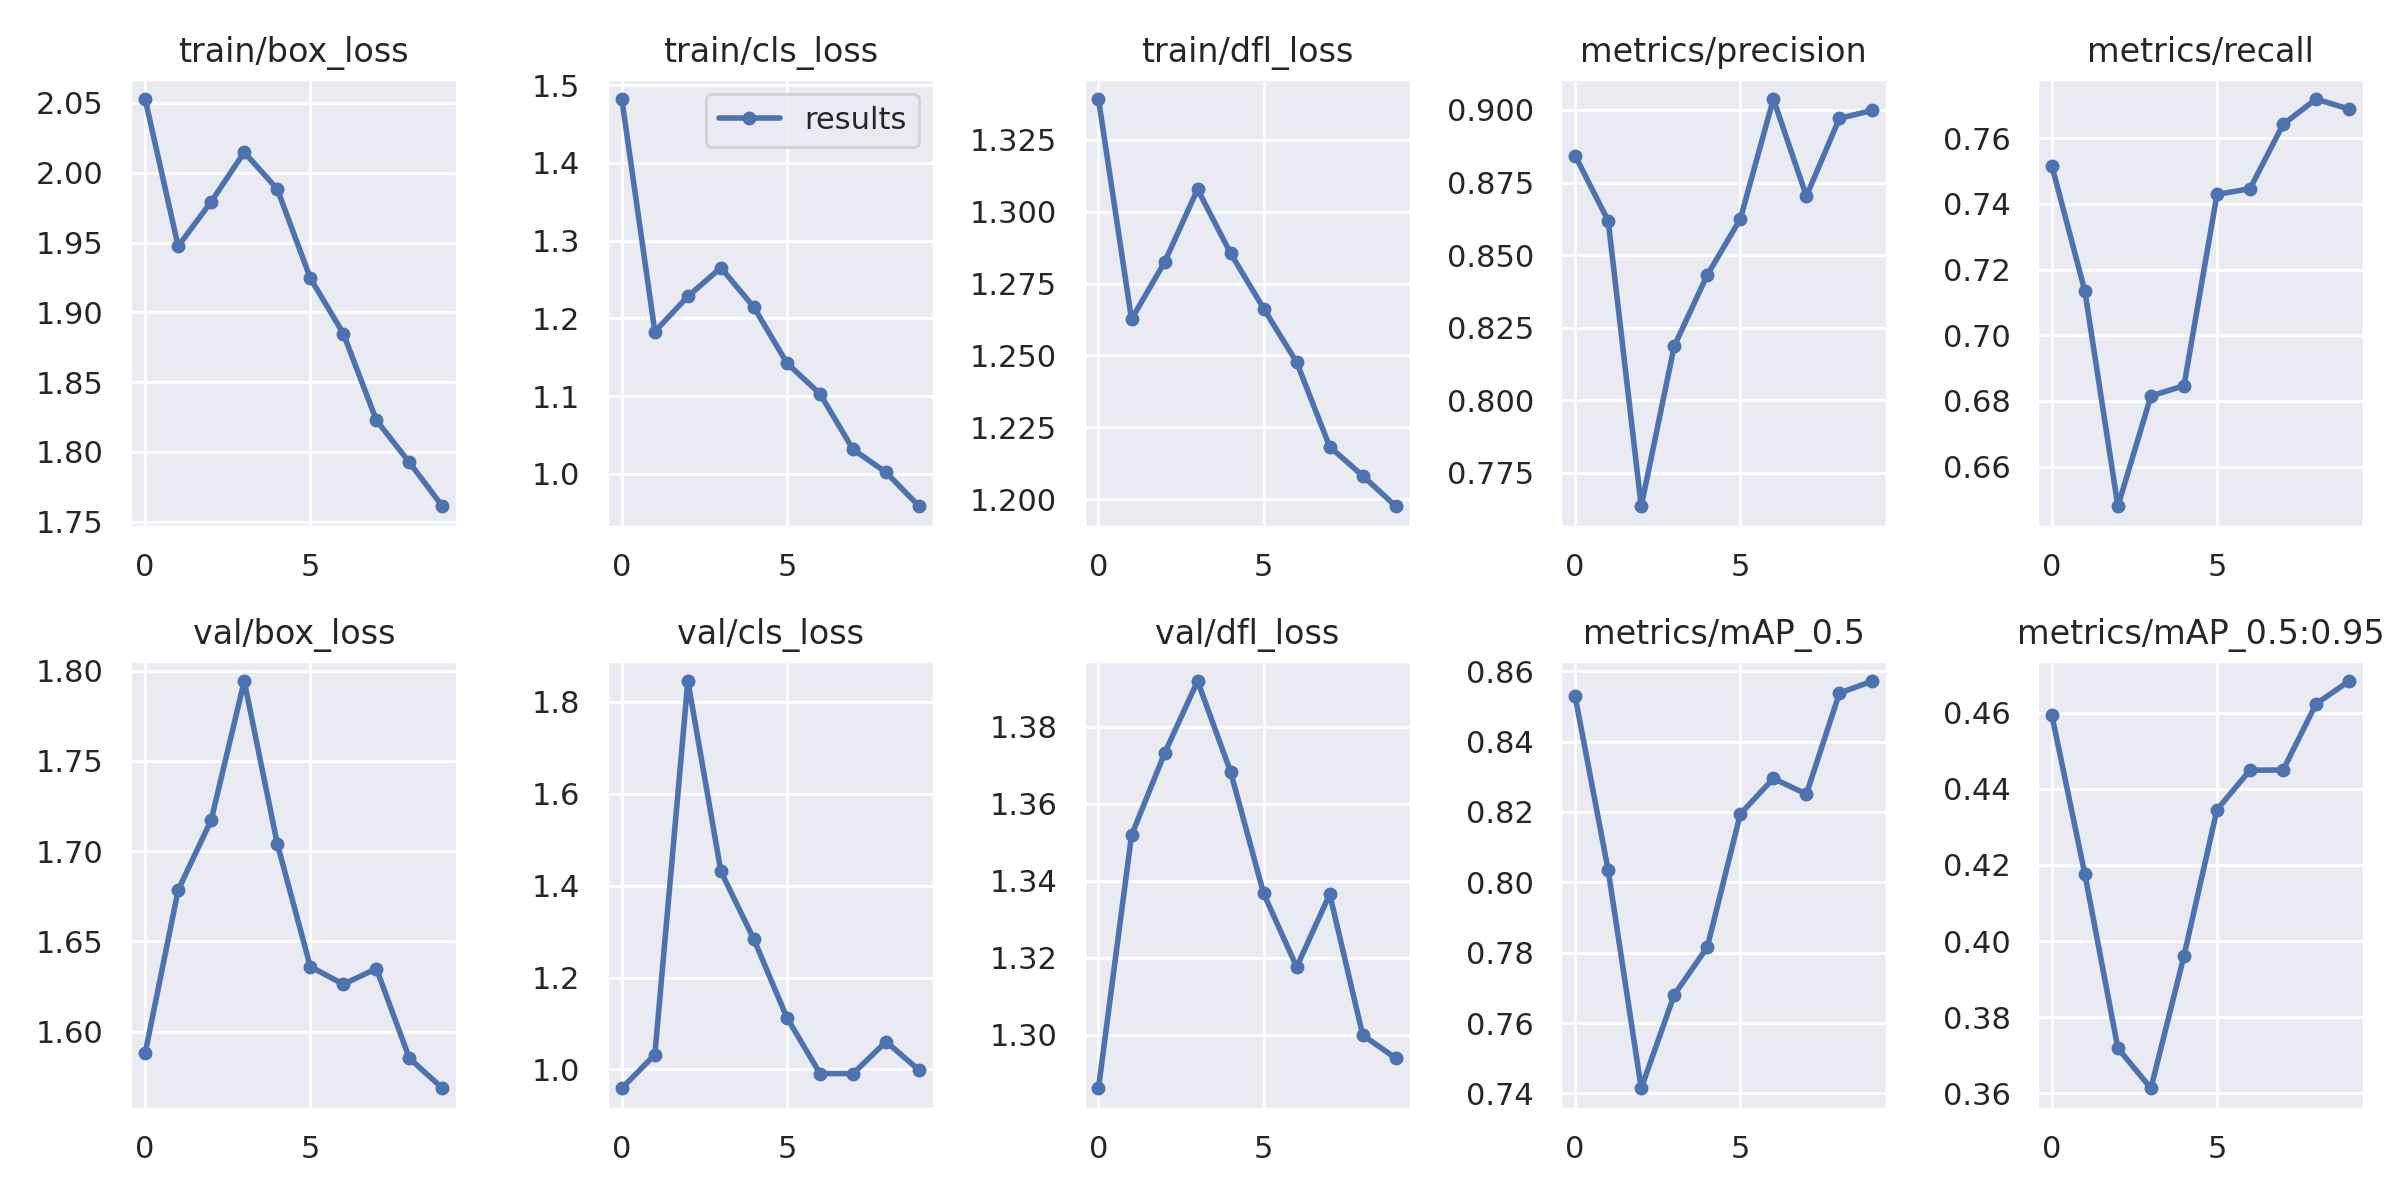

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

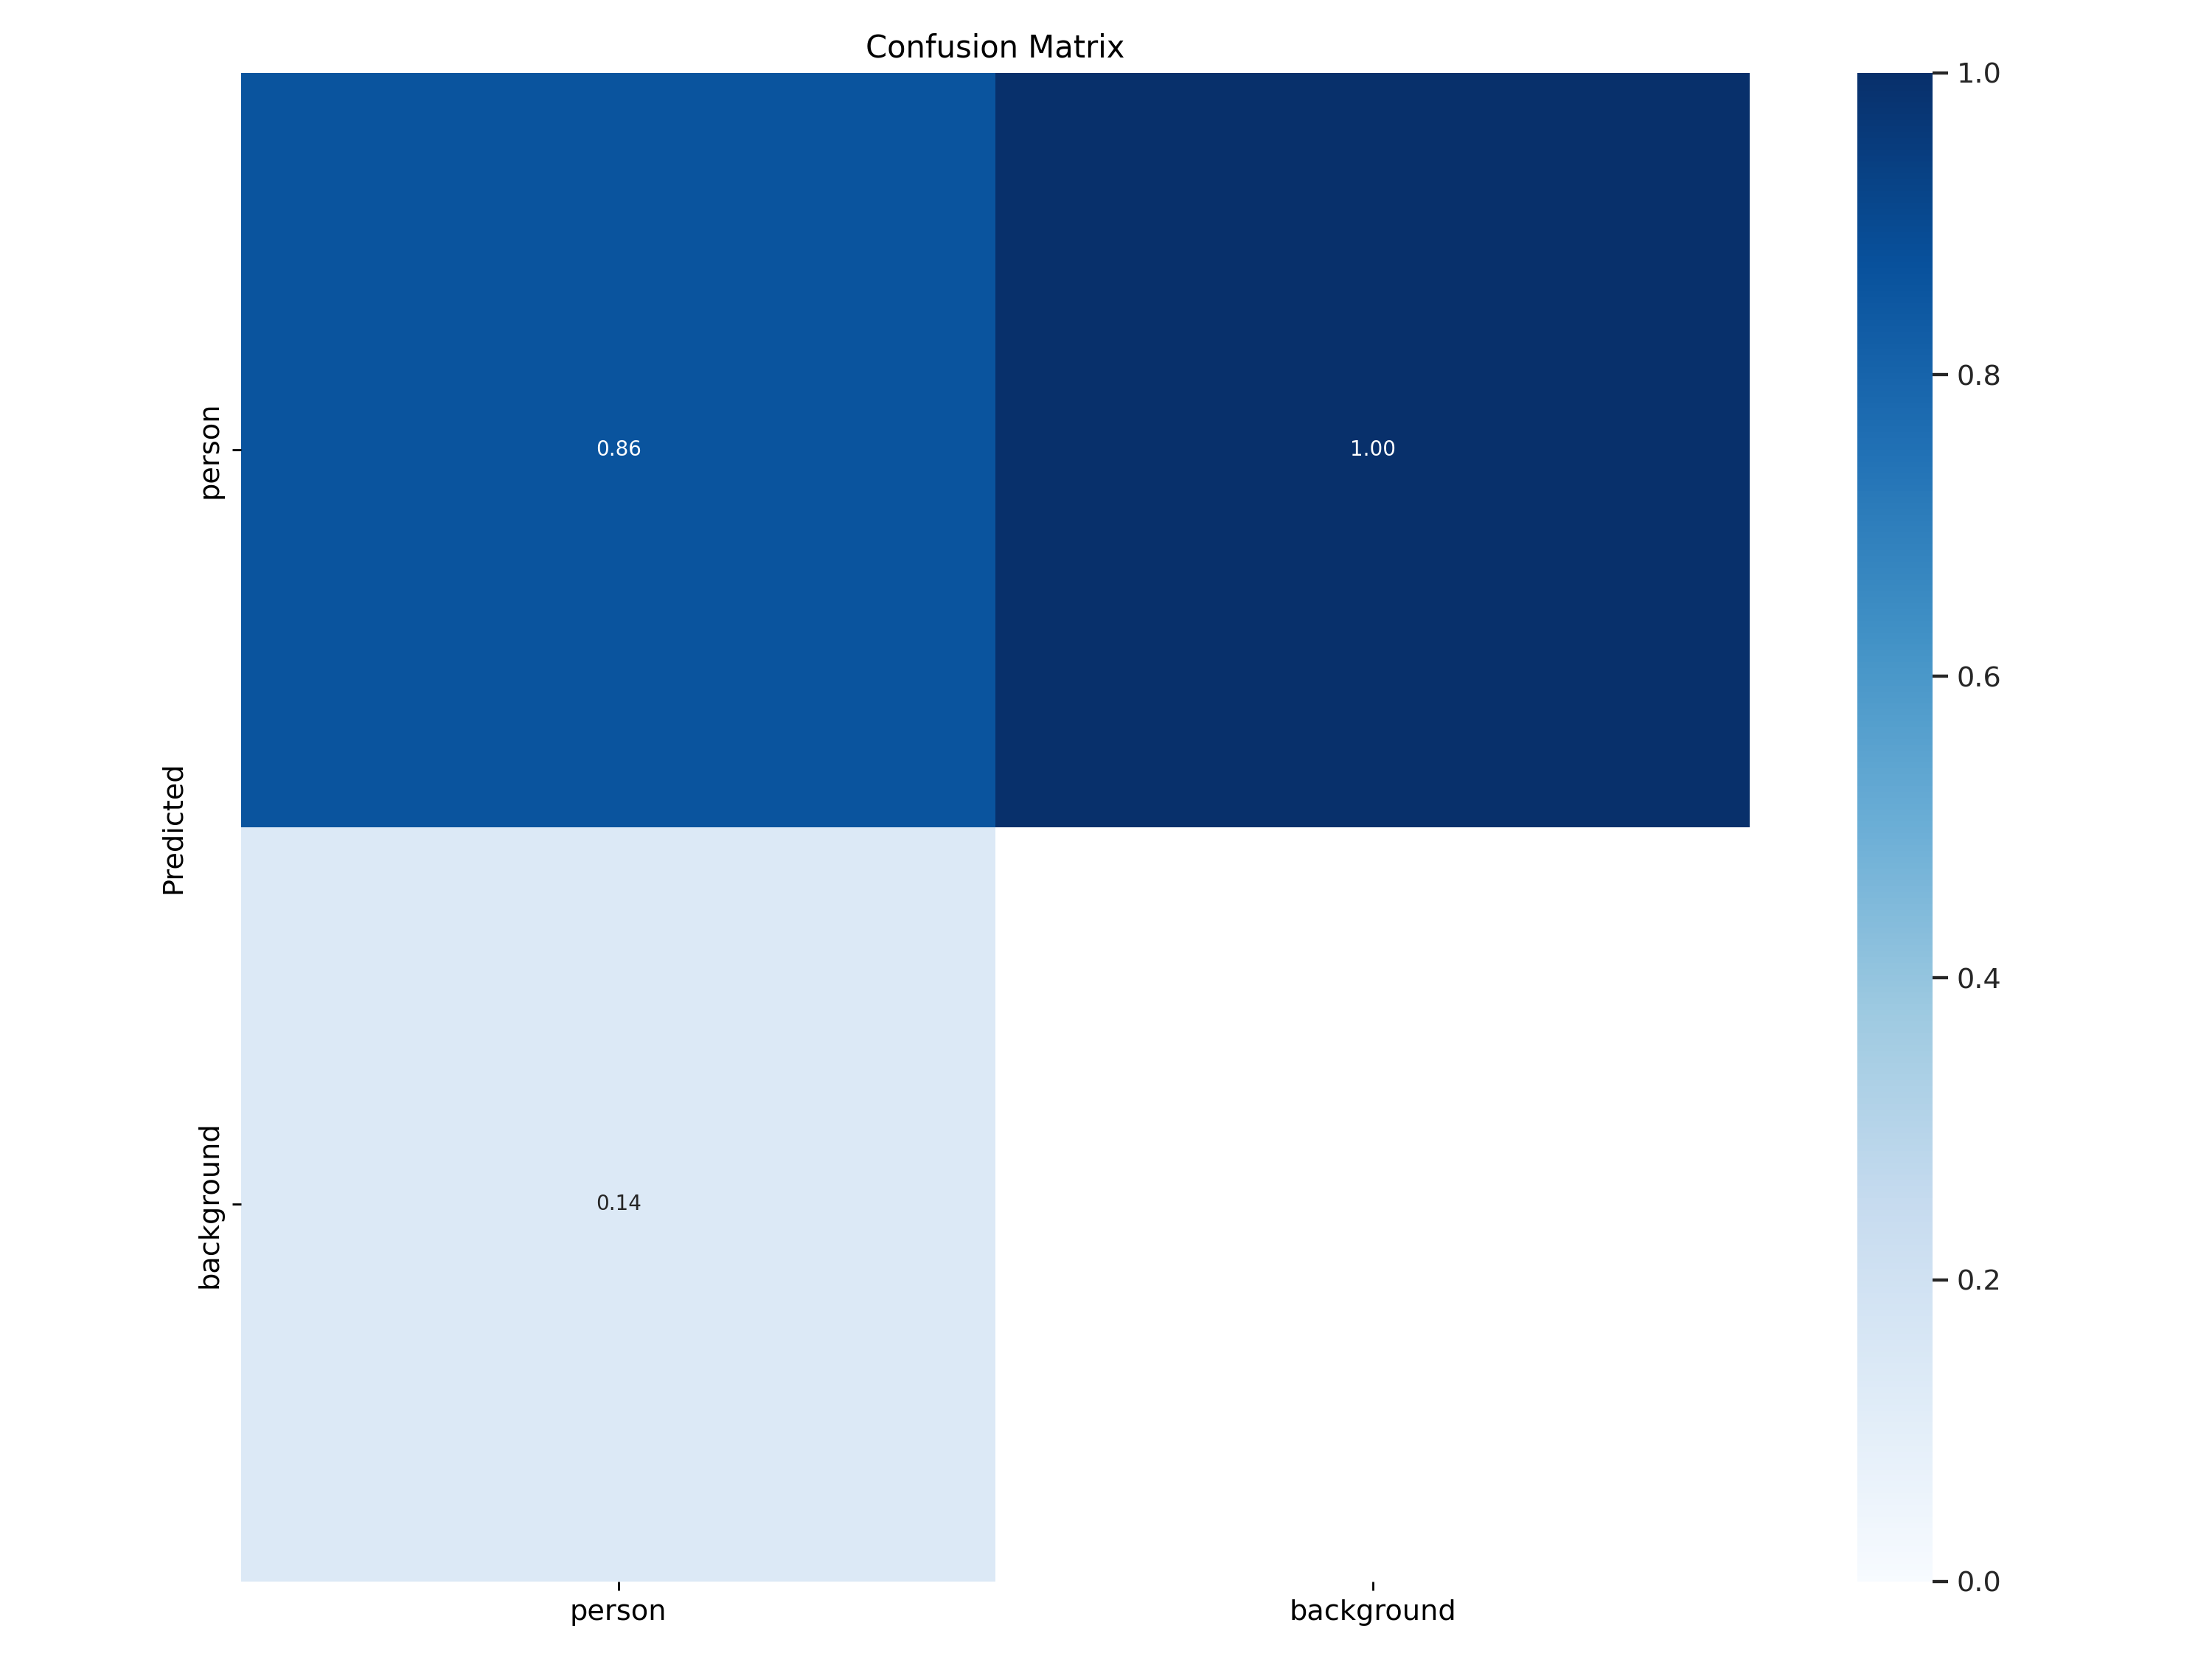

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch1_pred.jpg", width=1000)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Visual_Train/yolov9/runs/train/exp/val_batch1_pred.jpg'

In [ ]:
#Validating cusotm model


%cd {HOME}/yolov9

!python val.py \
--img 320 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {DATASET}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/drive/MyDrive/Visual_Train/yolov9
val: data=/content/drive/MyDrive/Dataset/llvip-visible-320/data.yaml, weights=['/content/drive/MyDrive/Visual_Train/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/drive/MyDrive/Visual_Train/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a f

In [ ]:
#Testing

!python detect.py \
--img 320 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {DATASET}/test/images


detect: weights=['/content/drive/MyDrive/Visual_Train/yolov9/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Dataset/llvip-visible-320/test/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/drive/MyDrive/Visual_Train/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob

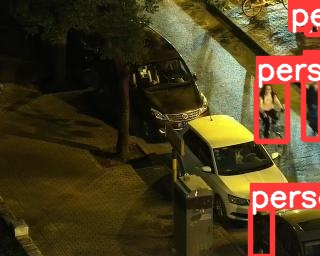

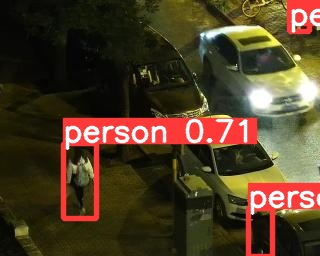

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:2]:
      display(Image(filename=image_path, width=320))

## Frontend

In [ ]:
def pred(img):
  !python {HOME}/yolov9/detect.py --weights {HOME}/yolov9/runs/train/exp/weights/best.pt --conf 0.5 --source {img} --device 0 --exist-ok --hide-labels --hide-conf

In [ ]:
pred('/content/drive/MyDrive/Dataset/llvip-visible-320/test/images/190001_jpg.rf.4eb9c786db328898eed7e8fce1a5f4f8.jpg')

detect: weights=['/content/drive/MyDrive/Visual_Train/yolov9/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Dataset/llvip-visible-320/test/images/190001_jpg.rf.4eb9c786db328898eed7e8fce1a5f4f8.jpg, data=yolov9/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/Visual_Train/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code 

In [ ]:
from PIL import Image

In [ ]:
!pip install pyngrok

In [ ]:
!ngrok config add-authtoken 2sM0BFRYIxPqWNtzgbrs7TbrmEd_qpaBXQE6io719CQDRALW

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
#Frontend
!pip install -q streamlit
#pred(/content/drive/MyDrive/Dataset/llvip-visible-320/test/images/190001_jpg.rf.4eb9c786db328898eed7e8fce1a5f4f8.jpg)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import os

def pred(img):
    cmd = f'python yolov9/detect.py --weights yolov9/runs/train/exp/weights/best.pt --conf 0.55 --source {img} --device 0 --exist-ok --line-thickness 2'
    os.system(cmd)

st.title("Visual Image Pedestrian Detection")

# Text input for image path
img = st.text_input("Enter Image path:", "/content/drive/MyDrive/Dataset/llvip-visible-320/test/images/190001_jpg.rf.4eb9c786db328898eed7e8fce1a5f4f8.jpg")

# Initialize session state variables
if "original_image_path" not in st.session_state:
    st.session_state.original_image_path = None  # Stores original image path
if "detect_clicked" not in st.session_state:
    st.session_state.detect_clicked = False  # Tracks if Detect was clicked

# Confirm button - Stores the selected image path
if st.button("Confirm"):
    st.session_state.original_image_path = img  # Save image path in session state
    st.session_state.detect_clicked = False  # Reset detect state when confirming new image

# Display original image if confirmed
if st.session_state.original_image_path:
    showimg = Image.open(st.session_state.original_image_path)
    st.image(showimg, caption="Original Image")

# Detect button - Runs detection and updates session state
if st.button("Detect"):
    with st.spinner("Processing..."):
        pred(st.session_state.original_image_path)
    st.session_state.detect_clicked = True  # Mark detection as done

# Display prediction only after Detect is clicked
if st.session_state.detect_clicked:
    predicted_img_path = f'/content/drive/MyDrive/Visual_Train/yolov9/runs/detect/exp/{st.session_state.original_image_path.split("/")[-1]}'

    if os.path.exists(predicted_img_path):  # Ensure file exists before displaying
        showpred = Image.open(predicted_img_path)
        st.image(showpred, caption="Predicted Image")
    else:
        st.error("Prediction image not found. Please check if detection ran successfully.")


Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok

# List all active tunnels
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    print(f"Tunnel name: {tunnel.name}, Public URL: {tunnel.public_url}")
    ngrok.disconnect(tunnel.public_url)  # Disconnect each tunnel

# Now try to connect again
url = ngrok.connect(addr="8501")
url

<NgrokTunnel: "https://a5e6-34-125-194-165.ngrok-free.app" -> "http://localhost:8501">

In [ ]:
!cat nohup.out




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.240.214.16:8501

python3: can't open file '/content/drive/MyDrive/Visual_Train/detect.py': [Errno 2] No such file or directory
2025-01-30 16:05:09.663 Uncaught app execution
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/content/drive/MyDrive/Visual_Train/app.py", line 17, in <module>
    showpred= Image.open(predictedimg)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/PIL/Image.py", line 3465, in open
    fp = builtins.open(filename, "rb")
         ^^^^^^^^^^^^^^^^^^